# 1.Loading Data

In [1]:
# Import the necessary libraries
import pandas as pd
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Upload the CSV file from your local machine
uploaded = files.upload()

# Assuming your file is called 'emergency_data.csv'
df = pd.read_csv('Emergency_data.csv')

# Show the first few rows of the data
df.head()


Saving Emergency_data.csv to Emergency_data.csv


,Patient_ID,Age,Gender,Arrival_Time,Triage_Level,Wait_Time (minutes),Consult_Time (minutes),Treatment_Time (minutes),Discharge_Time,Outcome,Re-admission (within 30 days)
0,1001,35,Male,2024-01-01 08:15,3,30,20,60,2024-01-01 10:05,Discharged,No
1,1002,67,Female,2024-01-01 11:45,1,10,50,120,2024-01-01 14:45,Admitted,No
2,1003,42,Male,2024-01-01 22:30,2,25,40,100,2024-01-02 01:15,Transferred,No
3,1004,55,Female,2024-01-02 13:10,2,20,35,90,2024-01-02 15:35,Discharged,Yes
4,1005,23,Male,2024-01-02 19:50,3,40,25,75,2024-01-02 22:20,Discharged,No


# 2.Data Preparation

In [9]:
# Check basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient_ID                     31 non-null     int64 
 1   Age                            31 non-null     int64 
 2   Gender                         31 non-null     object
 3   Arrival_Time                   31 non-null     object
 4   Triage_Level                   31 non-null     int64 
 5   Wait_Time (minutes)            31 non-null     int64 
 6   Consult_Time (minutes)         31 non-null     int64 
 7   Treatment_Time (minutes)       31 non-null     int64 
 8   Discharge_Time                 31 non-null     object
 9   Outcome                        31 non-null     object
 10  Re-admission (within 30 days)  31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


In [10]:
# Get summary statistics for numerical columns
df.describe()

,Patient_ID,Age,Triage_Level,Wait_Time (minutes),Consult_Time (minutes),Treatment_Time (minutes)
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1016.000000,49.387097,2.258065,25.645161,38.225806,102.903226
std,9.092121,16.616613,0.998924,13.159403,15.140915,35.771828
min,1001.000000,19.000000,1.000000,5.000000,15.000000,45.000000
25%,1008.500000,37.000000,1.500000,15.000000,25.000000,77.500000
50%,1016.000000,48.000000,2.000000,25.000000,35.000000,95.000000
75%,1023.500000,61.500000,3.000000,35.000000,50.000000,127.500000
max,1031.000000,82.000000,4.000000,50.000000,70.000000,180.000000


In [11]:
# Display column names to understand the dataset
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Arrival_Time', 'Triage_Level',
       'Wait_Time (minutes)', 'Consult_Time (minutes)',
       'Treatment_Time (minutes)', 'Discharge_Time', 'Outcome',
       'Re-admission (within 30 days)'],
      dtype='object')

In [12]:
# Check data types of each column
df.dtypes

,0
Patient_ID,int64
Age,int64
Gender,object
Arrival_Time,object
Triage_Level,int64
Wait_Time (minutes),int64
Consult_Time (minutes),int64
Treatment_Time (minutes),int64
Discharge_Time,object
Outcome,object


In [13]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Patient_ID                       0
Age                              0
Gender                           0
Arrival_Time                     0
Triage_Level                     0
Wait_Time (minutes)              0
Consult_Time (minutes)           0
Treatment_Time (minutes)         0
Discharge_Time                   0
Outcome                          0
Re-admission (within 30 days)    0
dtype: int64


# 3.Data Analysis and Visualization


## 1.Busiest Days and Times
## Question: What are the busiest days and times for the ED?

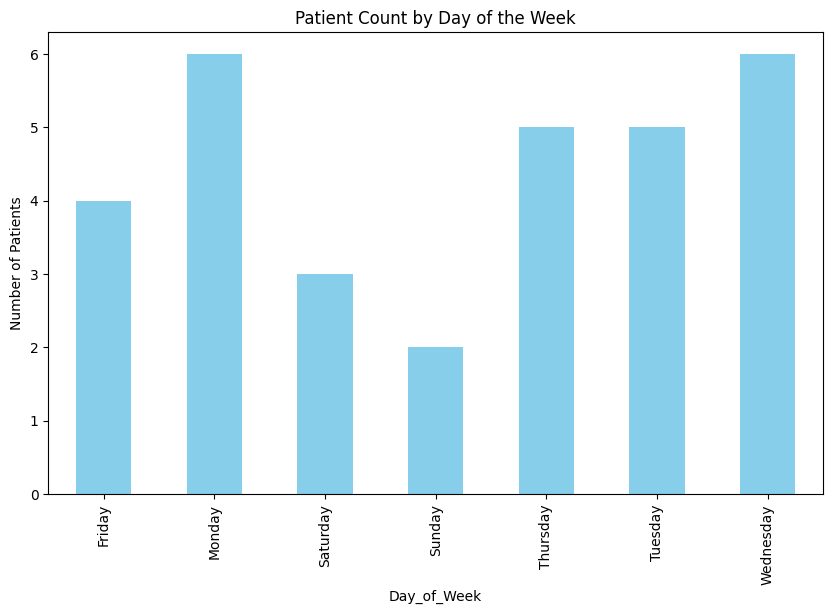

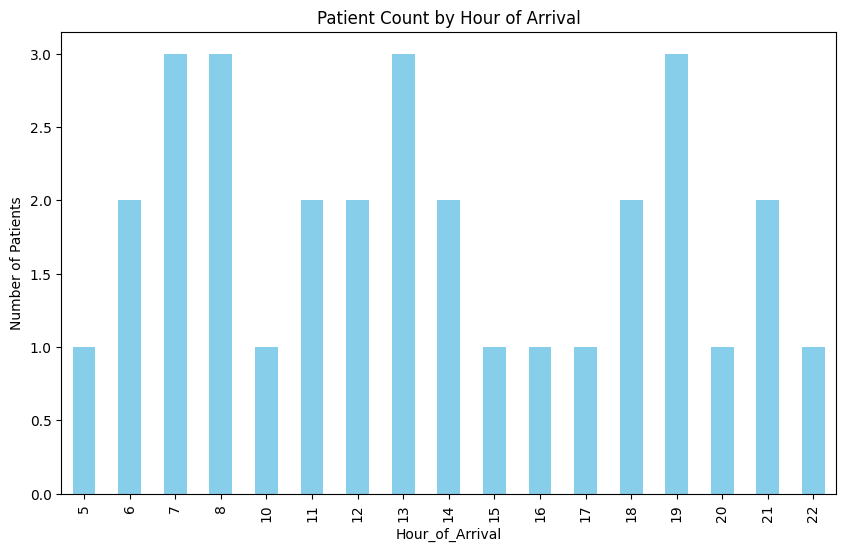

In [14]:
# Convert 'Arrival_Time' to datetime if necessary
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

# Extract day of the week and hour from the 'Arrival_Time'
df['Day_of_Week'] = df['Arrival_Time'].dt.day_name()
df['Hour_of_Arrival'] = df['Arrival_Time'].dt.hour

# Plot count of patients by day of the week
plt.figure(figsize=(10,6))
df['Day_of_Week'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Patient Count by Day of the Week')
plt.ylabel('Number of Patients')
plt.show()

# Plot count of patients by hour of arrival
plt.figure(figsize=(10,6))
df['Hour_of_Arrival'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Patient Count by Hour of Arrival')
plt.ylabel('Number of Patients')
plt.show()

## 2.Wait Time Distribution
## Question: What is the average waiting time, and how does it vary by triage level?

<ipython-input-15-3e88213c71dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Triage_Level', y='Wait_Time (minutes)', data=df, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple t

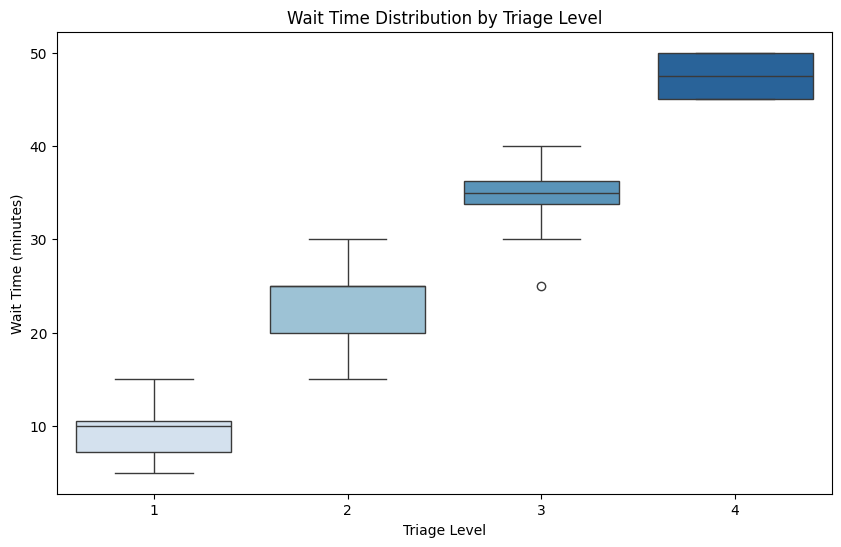

In [15]:
# Boxplot for wait times by triage level
plt.figure(figsize=(10,6))
sns.boxplot(x='Triage_Level', y='Wait_Time (minutes)', data=df, palette='Blues')
plt.title('Wait Time Distribution by Triage Level')
plt.ylabel('Wait Time (minutes)')
plt.xlabel('Triage Level')
plt.show()

## 3.Triage Level Distribution
## Question: What is the distribution of triage levels among patients?

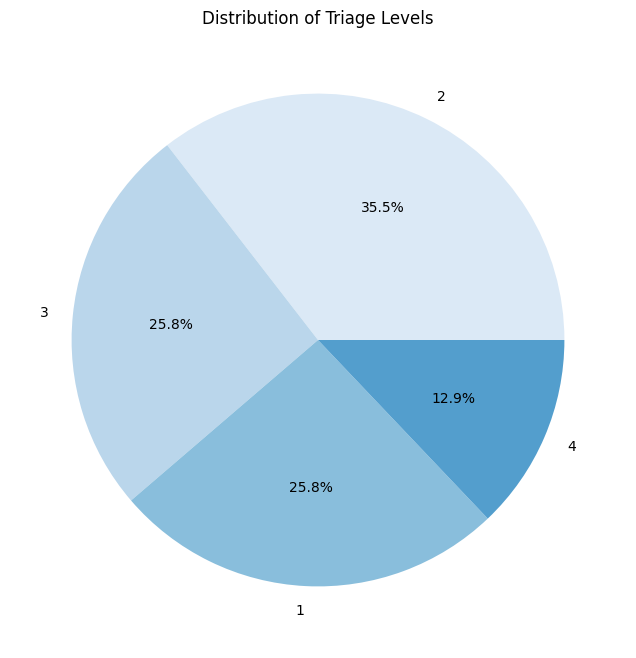

In [16]:
# Plot pie chart for triage level distribution
plt.figure(figsize=(8,8))
df['Triage_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Blues'))
plt.title('Distribution of Triage Levels')
plt.ylabel('')
plt.show()

## 4.Patient Outcomes
## Question: What is the distribution of patient outcomes?

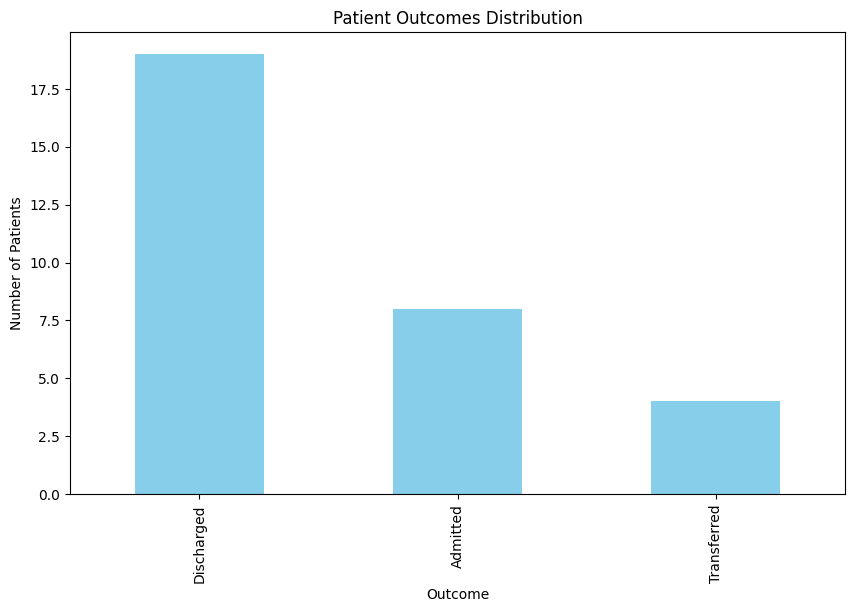

In [17]:
# Bar chart for patient outcomes
plt.figure(figsize=(10,6))
df['Outcome'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Patient Outcomes Distribution')
plt.ylabel('Number of Patients')
plt.xlabel('Outcome')
plt.show()

## 5.Length of Stay Analysis
## Question: What is the average length of stay (from arrival to discharge/admission)?

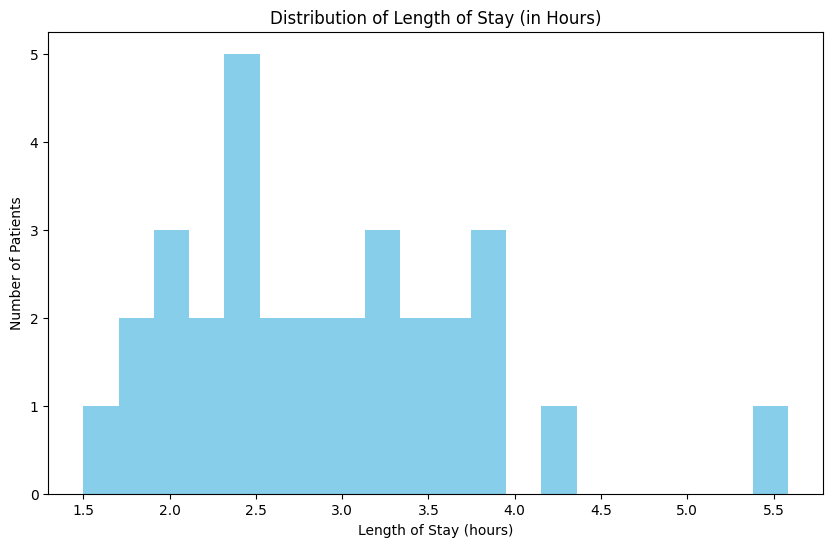

In [18]:
# Calculate Length of Stay (in hours) as difference between Arrival_Time and Discharge_Time
df['Discharge_Time'] = pd.to_datetime(df['Discharge_Time'])
df['Length_of_Stay'] = (df['Discharge_Time'] - df['Arrival_Time']).dt.total_seconds() / 3600  # convert to hours

# Plot histogram of length of stay
plt.figure(figsize=(10,6))
plt.hist(df['Length_of_Stay'], bins=20, color='skyblue')
plt.title('Distribution of Length of Stay (in Hours)')
plt.xlabel('Length of Stay (hours)')
plt.ylabel('Number of Patients')
plt.show()

## 6.Re-admission Rate
## Question: What percentage of patients return to the ED within 30 days?

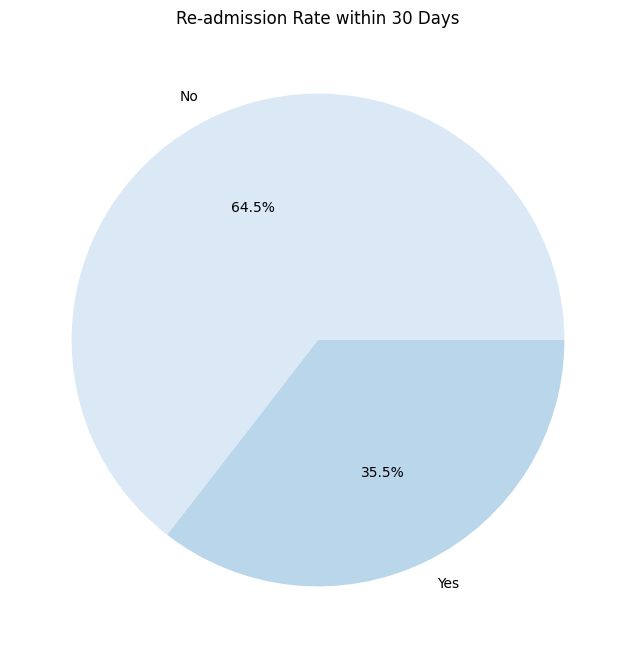

In [19]:
# Plot pie chart for re-admission rates
plt.figure(figsize=(8,8))
df['Re-admission (within 30 days)'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Blues'))
plt.title('Re-admission Rate within 30 Days')
plt.ylabel('')
plt.show()

## 7.Patient Demographics
## Question: What is the age and gender distribution of patients in the ED?


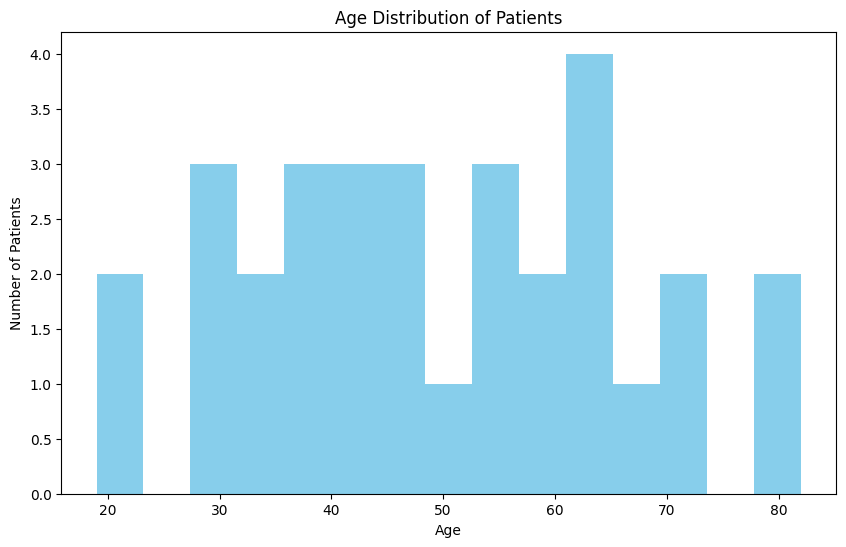

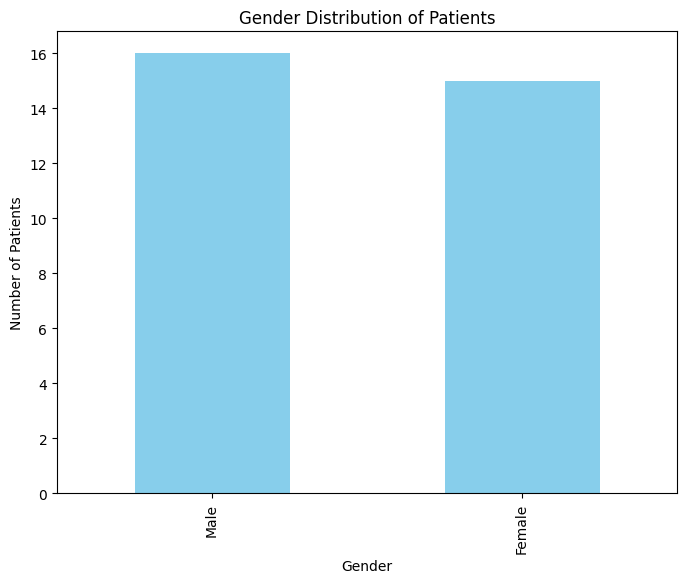

In [20]:
# Histogram for age distribution
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=15, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

# Bar chart for gender distribution
plt.figure(figsize=(8,6))
df['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender Distribution of Patients')
plt.ylabel('Number of Patients')
plt.xlabel('Gender')
plt.show()

## 8.Treatment Time by Triage Level
## Question: How does treatment time vary for different triage levels?

<ipython-input-21-244ceda0ea47>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Triage_Level', y='Treatment_Time (minutes)', data=df, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

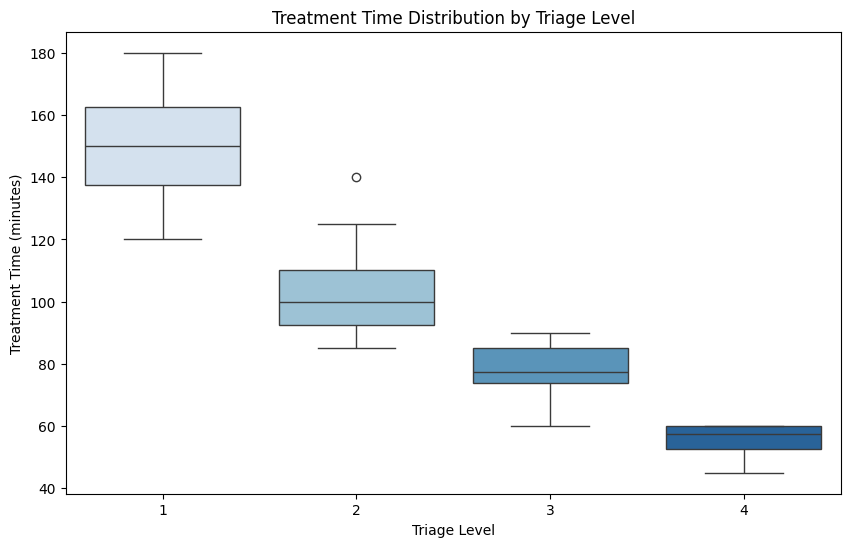

In [21]:
# Boxplot for treatment time by triage level
plt.figure(figsize=(10,6))
sns.boxplot(x='Triage_Level', y='Treatment_Time (minutes)', data=df, palette='Blues')
plt.title('Treatment Time Distribution by Triage Level')
plt.ylabel('Treatment Time (minutes)')
plt.xlabel('Triage Level')
plt.show()

## 9.Critical Patients (Triage 1 and 2) Efficiency
## Question: Are critical patients treated faster?

<ipython-input-22-a2d7c8628547>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Triage_Level', y='Consult_Time (minutes)', data=critical_patients, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

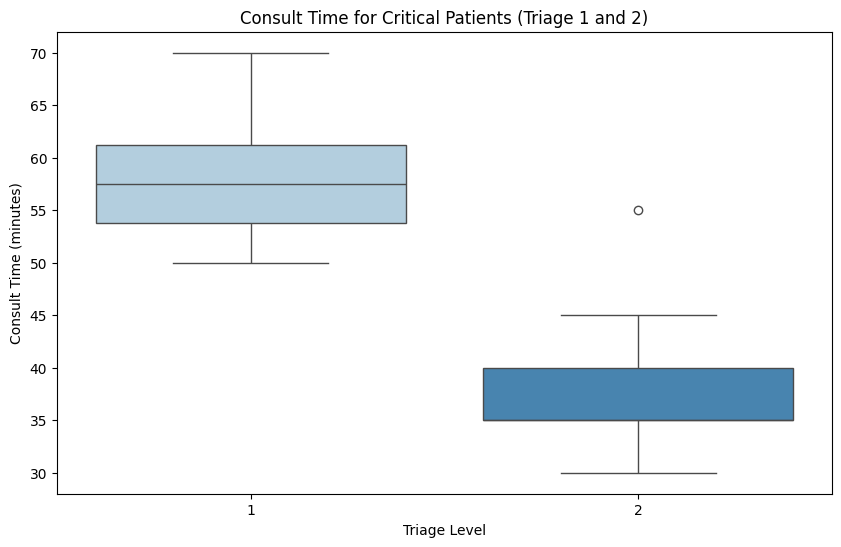

In [22]:
# Filter for triage level 1 and 2
critical_patients = df[df['Triage_Level'].isin([1, 2])]

# Boxplot for consult time for critical patients
plt.figure(figsize=(10,6))
sns.boxplot(x='Triage_Level', y='Consult_Time (minutes)', data=critical_patients, palette='Blues')
plt.title('Consult Time for Critical Patients (Triage 1 and 2)')
plt.ylabel('Consult Time (minutes)')
plt.xlabel('Triage Level')
plt.show()

## 10.Correlation between Variables
## Question: What factors are correlated in the ED dataset?

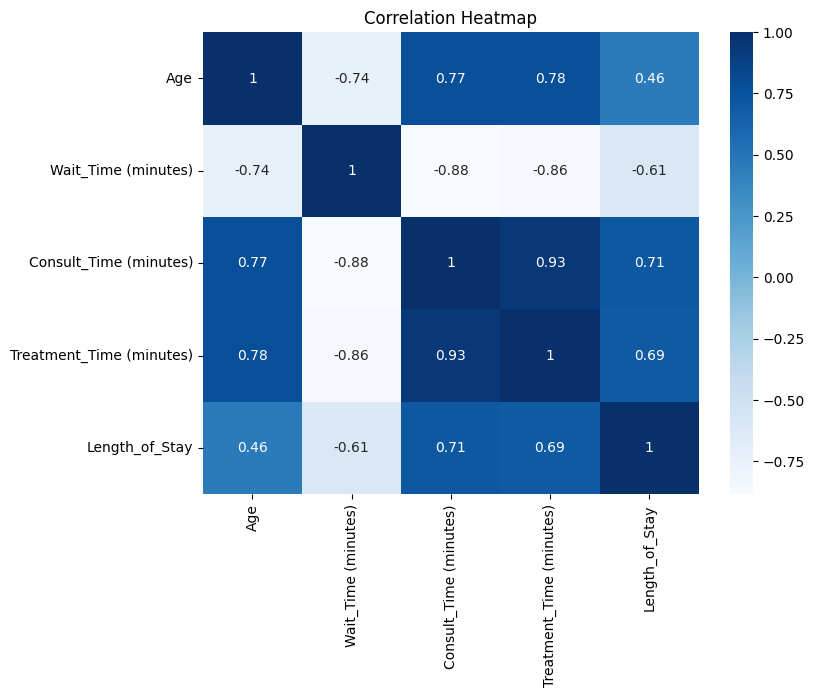

In [23]:
# Compute the correlation matrix
correlation_matrix = df[['Age', 'Wait_Time (minutes)', 'Consult_Time (minutes)', 'Treatment_Time (minutes)', 'Length_of_Stay']].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()